In [1]:
# Basic dependencies:
import  numpy as np
import  matplotlib.pyplot as plt


In [2]:
# load the packages being tested:
import bms

from bms.parts import *
from nav.coordinates import *


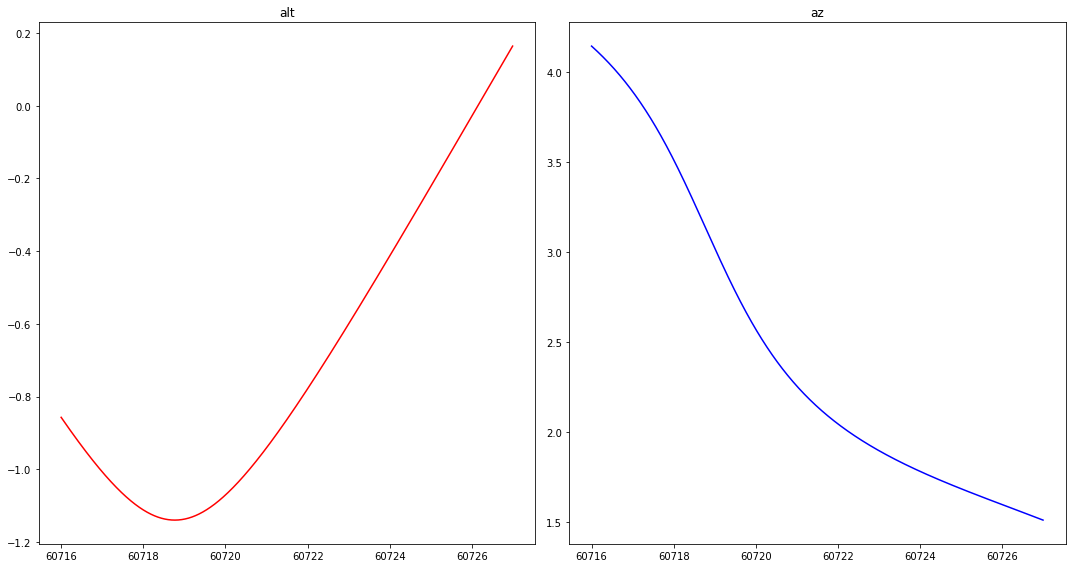

In [20]:
# test mjd
import lusee
import numpy as np
from lusee import Observation as O

fig, (p1, p2) = plt.subplots(1,2)

interval = "2025-02-10 00:00:00 to 2025-02-20 23:45:00"
o = O(interval)

(alt, az) = o.get_track_solar('sun')

y = np.array(alt)

length = o.times.size

x = np.empty(length)

for i in range(length):
    x[i] = o.times[i].mjd

plt.rcParams["figure.figsize"] = [15., 8.]
plt.rcParams["figure.autolayout"] = True

p1.set_title("alt")
p1.plot(x, alt, color="red")

y = np.array(az)
p2.set_title("az")
p2.plot(x, az, color="blue")
plt.show()



Current directory: /home/maxim/projects/lusee/power/notebooks
Number of points: 2928


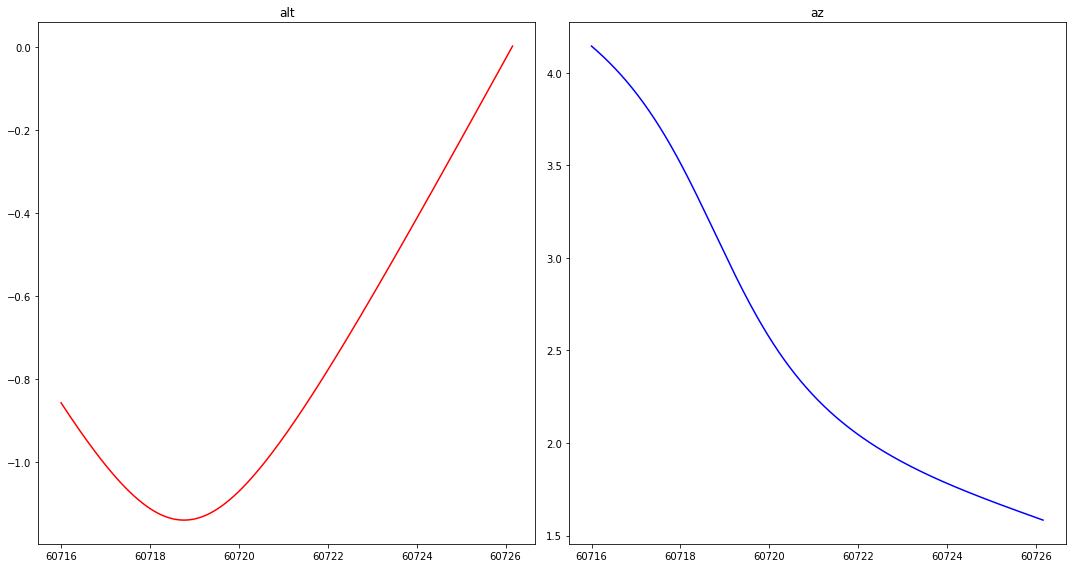

In [19]:
# Now testing with the prefab data
import os
print('Current directory:', os.getcwd())

cachefile = '../data/2025-02-10_20.npy'
with open(cachefile, 'rb') as f: mjd_alt_az = np.load(f)

print('Number of points:', mjd_alt_az.size)

mjd = mjd_alt_az[:,0]
alt = mjd_alt_az[:,1]
az  = mjd_alt_az[:,2]

fig, (p1, p2) = plt.subplots(1,2)

plt.rcParams["figure.figsize"] = [15., 8.]
plt.rcParams["figure.autolayout"] = True

p1.set_title("alt")
p1.plot(mjd, alt, color="red")

y = np.array(az)
p2.set_title("az")
p2.plot(mjd, az, color="blue")
plt.show()


In [22]:
# using radians:

alt_sun_top = np.asarray(alt)+sun_rad

sun     = altaz2xyz(alt, az)
sun_top = altaz2xyz(alt_sun_top, az)

battery = Battery(11.6)
print('Battery voltage:', battery.voltage)

ctr = Controller(battery)
print('Battery voltage from controller:', ctr.battery.voltage)

battery.set_voltage(10.1)
print('Battery voltage from controller:', ctr.battery.voltage)


e = EPanel(sun, 'E')
ctr.add_panel(e)

w = WPanel(sun, 'W')
ctr.add_panel(w)

t = TPanel(sun, 'T')
ctr.add_panel(t)

e_dot = e.dot(sun)
w_dot = w.dot(sun)
t_dot = t.dot(sun)

# When dot product is negative, panel is not illuminated
e_dot[e_dot<0] = 0.0
w_dot[w_dot<0] = 0.0
t_dot[t_dot<0] = 0.0

t_dot_sun_top = t.dot(sun_top)
t_dot_sun_top[t_dot_sun_top<0] = 0.0 # For finite disk at sunrise/sunset. Slight aprx: top of sun not center of segment

print(e_dot, w_dot, t_dot)

# Sanitize input to arccos and sqrt. Values where h<0 are non-physical and will be cut by condition_list.
alt_seg = np.abs(alt)
alt_seg[alt_seg>sun_rad]=sun_rad
sun_seg_area = (sun_rad**2)*np.arccos(1-((sun_rad-alt_seg)/sun_rad))-alt_seg*np.sqrt((sun_rad**2)-(alt_seg)**2)
sun_seg_frac = sun_seg_area/(np.pi*sun_rad**2)

Battery voltage: 11.6
Battery voltage from controller: 11.6
Battery voltage from controller: 10.1
[0.         0.         0.         ... 0.98558887 0.98521309 0.98483248] [0.55215409 0.55031324 0.54846971 ... 0.         0.         0.        ] [0.         0.         0.         ... 0.15921127 0.16120468 0.16319735]
